In [82]:
import numpy as np
import os
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [159]:
#model_dir = '/neurospin/dico/jlaval/Output/5_models_FIP_right_3_layer_proj/pepper_05_4'
#model_dir = '/neurospin/dico/jlaval/Output/FIP_right_ConvNet_v1/16-48-07_3'
model_dir = '/neurospin/dico/jlaval/Output/5_models_FIP_left_3_layer_proj/16-34-28_4'
labels = pd.read_csv('/neurospin/dico/data/deep_folding/current/datasets/hcp/FIP/FIP_labels.csv')
embs = pd.read_csv(os.path.join(model_dir, 'FIP_left_custom_embeddings/custom_cross_val_embeddings.csv'))
dims = embs.columns[1:].tolist()
cols = ['Subject'] + dims
embs.columns = cols
ukb_embs = pd.read_csv(os.path.join(model_dir, 'ukb40_random_embeddings/full_embeddings.csv'))
ukb_embs_np = ukb_embs[dims].to_numpy()
## labels
#label_list = ['Right_FIP']
label_list = ['Left_FIP']

for label in label_list:
    # train logistic on embs
    print(f'Treating label : {label}')
    model = LogisticRegression(max_iter=1000, random_state=0)
    df = embs.merge(labels, on='Subject')
    Y = df[label].to_numpy()
    X = df[dims].to_numpy()
    print(X.shape, Y.shape)

    model.fit(X,Y)

    ukb_probas = model.predict_proba(ukb_embs_np)

    df_ukb = pd.DataFrame({'Subject': ukb_embs.ID, 'probas': ukb_probas[:, 1]})

    save_dir = os.path.join(model_dir, f'ukb40_random_embeddings/{label}')
    if not os.path.isdir(save_dir):
        os.mkdir(save_dir)
    df_ukb.to_csv(os.path.join(save_dir, 'ukb_probas.csv'), index=False)

Treating label : Left_FIP
(312, 32) (312,)


In [160]:
model.predict_proba(X)[:, 1].reshape(-1).shape

(312,)

(array([ 9530.,  3145.,  2195.,  1842.,  1732.,  1874.,  2013.,  2478.,
         3997., 13627.]),
 array([2.78032733e-04, 1.00244553e-01, 2.00211074e-01, 3.00177595e-01,
        4.00144115e-01, 5.00110636e-01, 6.00077156e-01, 7.00043677e-01,
        8.00010198e-01, 8.99976718e-01, 9.99943239e-01]),
 <BarContainer object of 10 artists>)

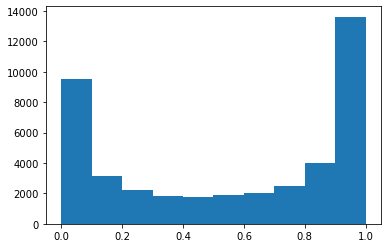

In [161]:
plt.hist(ukb_probas[:, 1])

The model is very confident on the interrupted sulci (in the right IPS), whereas the non interrupted look more similar than the interrupted ?